In [1]:
import datetime
import numpy as np
import pandas as pd
from yahoo_finance_api import YahooFinance as yf
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
# %matplotlib notebook

In [28]:
stock_symbol = 'TCS.NS'

my_stock = pd.DataFrame()

my_stock = yf(ticker = stock_symbol, 
                       result_range='7d',
                       interval = '1m',
                       dropna = True).result[['Open', 'High', 'Low', 'Close', 'Volume']]

print('Shape of the dataframe: ', my_stock.shape)

my_stock.head()

Shape of the dataframe:  (2625, 5)


,Open,High,Low,Close,Volume
2020-10-15 09:15:00,2811.00,2826.25,2808.85,2820.9,0
2020-10-15 09:16:00,2819.50,2819.50,2807.25,2810.7,103253
2020-10-15 09:17:00,2809.80,2811.10,2803.60,2806.7,60484
2020-10-15 09:18:00,2806.75,2807.50,2803.40,2806.9,37297
2020-10-15 09:19:00,2806.95,2806.95,2800.00,2800.2,45588


In [29]:
close_series = my_stock['Close']
close_series

2020-10-15 09:15:00    2820.90
2020-10-15 09:16:00    2810.70
2020-10-15 09:17:00    2806.70
2020-10-15 09:18:00    2806.90
2020-10-15 09:19:00    2800.20
                        ...   
2020-10-23 15:25:00    2687.90
2020-10-23 15:26:00    2688.40
2020-10-23 15:27:00    2687.95
2020-10-23 15:28:00    2686.70
2020-10-23 15:29:00    2687.40
Name: Close, Length: 2625, dtype: float64

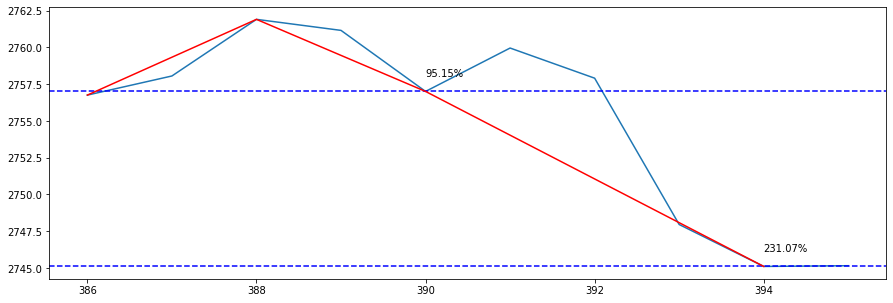

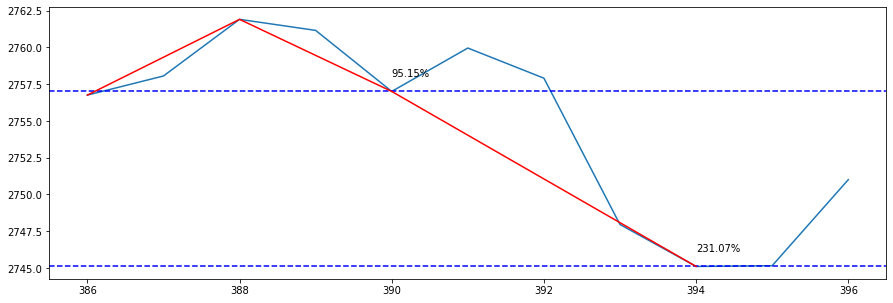

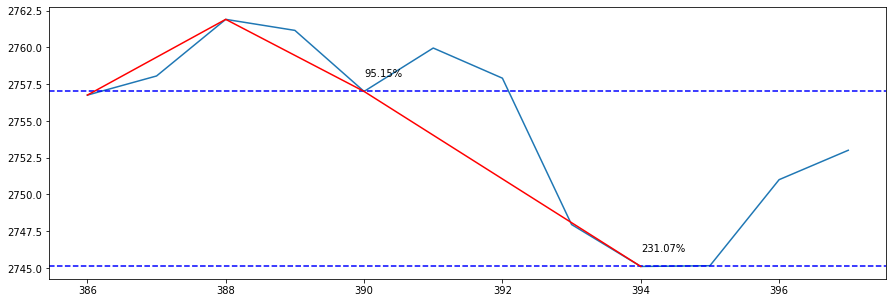

In [60]:
error_allowance = 10.0/100
for i in range(50, len(close_series)):
    max_idx = list(argrelextrema(close_series.values[:i], comparator = np.greater, order = 2)[0])
    min_idx = list(argrelextrema(close_series.values[:i], comparator = np.less, order = 2)[0])
    idx = max_idx + min_idx + [len(close_series.values[:i] - 1)]
    idx.sort()
#     print('max_idx: ', max_idx)
#     print('min_idx: ', min_idx)
#     print('IDX: ', idx)
    current_index = idx[-5:]
    
    current_price = close_series.values[current_index]
    
    start = min(current_index)
    end = max(current_index)
    
    X_A = current_price[1] - current_price[0]
    A_B = current_price[2] - current_price[1]
    B_C = current_price[3] - current_price[2]
    C_D = current_price[4] - current_price[3]
    # for bullish gartlet pattern
    if ((X_A > 0) & (A_B < 0) & (B_C < 0)):
        
        A_B_range = np.array([1.0 - error_allowance, 1.0 + error_allowance]) * abs(X_A)
        B_C_range = np.array([2.33 - error_allowance, 2.33 + error_allowance]) * abs(X_A)
#         C_D_range = np.array([3.77 - error_allowance, 3.77 + error_allowance]) * abs(X_A)
#         print('inside if')
        if ((A_B_range[0] < abs(A_B) < A_B_range[1]) & (B_C_range[0] < abs(B_C) < B_C_range[1]) ):
#             print('A_B retracement to X_A is: {}% which is within tolerance limit of {}% to 61.8% '.format(round(((abs(A_B) / abs(X_A))*100), 2), error_allowance*100))
#             print('B_C retracement to A_B is: {}% which is within tolerance limit of {}% in range of 38.2 to 88.6%'.format(round(((abs(B_C) / abs(A_B))*100), 2), error_allowance*100))
#             print('C_D retracement to B_C is: {}% which is within tolerance limit of {}% in range of 127 to 161.8%'.format(round(((abs(C_D) / abs(B_C))*100), 2), error_allowance*100))
            plt.figure(figsize = (15,5))
            plt.plot(np.arange(start,i), close_series.values[start:i])
            ### horizontal_line
            plt.axhline(y = current_price[2], color = 'b', linestyle = '--')
            plt.text(current_index[2], current_price[2]+1, str(round(((abs(A_B) / abs(X_A))*100), 2))+'%')
            plt.axhline(y = current_price[3], color = 'b', linestyle = '--')
            plt.text(current_index[3], current_price[3]+1, str(round(((abs(B_C) / abs(X_A))*100), 2))+'%')
            plt.plot(current_index[:-1], current_price[:-1], c = 'r')
#             plt.axhline(y = current_price[3], color = 'b', linestyle = '--')
#             plt.text(current_index[3], current_price[1] * (2.77), 'FIB retracement: 377%')
            plt.show()

        